# SALMAN HAFEEZ

In [1]:
# Research question/interests
# I want to see how does the cause-of-fire vary from 1990 to 2020 for different provinces and territories?
# More specifically, I want to know (over thirty year period) which provinces have had more fire causes by man as opposed to natural cause?
# How does the size-of-fire vary from 1990 to 2020 for different provinces and territories? 


import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

area_burned_by_cause = pd.read_csv("../data/raw/NFD-Area_burned_by_cause_class-ENFR.csv", encoding="latin")

area_burned_by_fire_size = pd.read_csv("../data/raw/NFD-Area_burned_by_fire_size_class-ENFR.csv", encoding="latin")

area_burned_by_month = pd.read_csv("../data/raw/NFD-Area_burned_by_month-ENFR.csv", encoding="latin")

number_of_fires_by_cause = pd.read_csv("../data/raw/NFD-Number_of_fires_by_cause_class-ENFR.csv", encoding="latin")

number_of_fires_by_fire_size = pd.read_csv("../data/raw/NFD-Number_of_fires_by_fire_size_class-ENFR.csv", encoding="latin")

number_of_fires_by_month = pd.read_csv("../data/raw/NFD-Number_of_fires_by_month-ENFR.csv", encoding="latin")
                                       
# property_loss = pd.read_csv("../data/raw/NFD-Property_losses_from_fires-ENFR.csv",encoding="latin")


# MILESTONE 3
## Task 1 Exploratory Data Analysis (EDA)
## Displaying number of row and columns, and general description for each dataset

Number of rows and columns for area_burned_by_cause:  (939, 11)
Columns in the dataset: Index(['ï»¿Year', 'AnnÃe', 'ISO', 'Jurisdiction', 'Juridiction', 'Cause',
       'Origine', 'Area (hectares)', 'Data Qualifier',
       'Superficie (en hectare)', 'Qualificatifs de donnÃes'],
      dtype='object')
                         count          mean            std     min      25%  \
ï»¿Year                  939.0   2005.066028       8.819676  1990.0  1997.50   
AnnÃe                   939.0   2005.066028       8.819676  1990.0  1997.50   
Area (hectares)          939.0  79390.815864  261596.855417     0.0    74.25   
Superficie (en hectare)  939.0  79390.815864  261596.855417     0.0    74.25   

                            50%           75%         max  
ï»¿Year                  2005.0   2013.000000     2020.00  
AnnÃe                   2005.0   2013.000000     2020.00  
Area (hectares)          2773.5  35924.193075  3407674.14  
Superficie (en hectare)  2773.5  35924.193075  3407674.

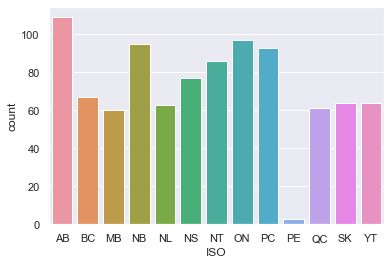

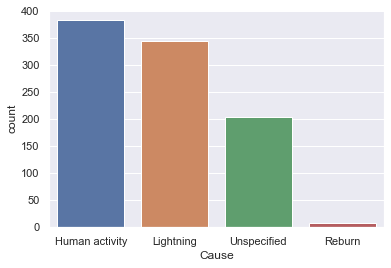

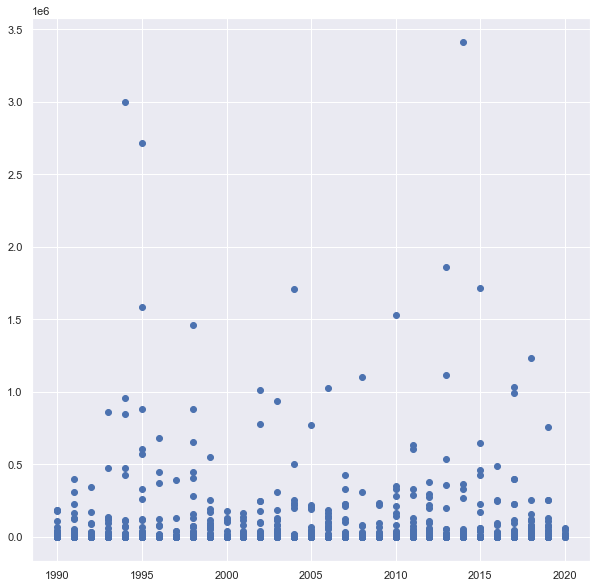

In [2]:


print(f"Number of rows and columns for area_burned_by_cause:  {area_burned_by_cause.shape}")
print(f"Columns in the dataset: {area_burned_by_cause.columns}")
print(area_burned_by_cause.describe().T)
area_burned_by_cause.describe(include='object').T


sns.set_theme(style="darkgrid")
ax = sns.countplot(x='ISO',data=area_burned_by_cause)
plt.show()
ay = sns.countplot(x='Cause',data=area_burned_by_cause)
plt.show()

plt.figure(figsize=(10,10))
plt.plot(area_burned_by_cause['ï»¿Year'],area_burned_by_cause['Area (hectares)'],'o')
plt.show()

# following is just for reference. shows the area burnt for BC
# plt.plot( area_burned_by_cause[area_burned_by_cause['ISO']=='BC']['ï»¿Year'], area_burned_by_cause[area_burned_by_cause['ISO']=='BC']['Area (hectares)'],'o')
# plt.ylabel('Area burnt (hectares)')

 

#### Observations
- This dataset shows the area burnt for different fire causes. There are many redunant columns with French titles. These will be removed in next steps.
- PC stands for Parks-Canada. This implies that fires taking place in federal parks are tracked separately irrespective of province. We shall consider PC to be its  own location in our analysis
- No negative values for area
- Minimum value of area-burnt is 0. This are instances when either no fire was observed or fire size was insignficantly small. These (zero) values are of no use for our analysis (no meaning about long term patterns or common fire cause can be derieved from them) and will be removed in next steps.
- Prince Edward Island has least data availiable; just two instances of fires burnt. These are to be removed as 2 values are insufficient to derieve any conclusions about trends over a thirty year (1990 to 2020) period. Morever, when using FacetGrid (where y-axis is common for all graphs) due to PE data, sub-plots will be extremely skewed which again hinders analysis. 
- The second plot shows that cause of some fires is Unspecified (not known) and/or (a few ones) reburn. We can not derieve much meaning for our analysis from these values and these shall be removed in next steps. 
- The third plot shows that majority of fires have an area burnt  less than 2 Million hectares
- ISO columns (showing provinces names) will be renamed to Location in next steps.
- Area (hectares) should be renamed to Area_hectares to allow for easier indexing during next steps. 


Number of rows and columns for number_of_fires_by_cause:  (939, 11)
Columns in the dataset: Index(['ï»¿Year', 'AnnÃe', 'ISO', 'Jurisdiction', 'Juridiction', 'Cause',
       'Origine', 'Number', 'Data Qualifier', 'Nombre',
       'Qualificatifs de donnÃes'],
      dtype='object')
         count         mean         std     min     25%     50%     75%  \
ï»¿Year  939.0  2005.066028    8.819676  1990.0  1997.5  2005.0  2013.0   
AnnÃe   939.0  2005.066028    8.819676  1990.0  1997.5  2005.0  2013.0   
Number   939.0   235.576145  331.276869     1.0    21.0    89.0   329.5   
Nombre   939.0   235.576145  331.276869     1.0    21.0    89.0   329.5   

            max  
ï»¿Year  2020.0  
AnnÃe   2020.0  
Number   2888.0  
Nombre   2888.0  


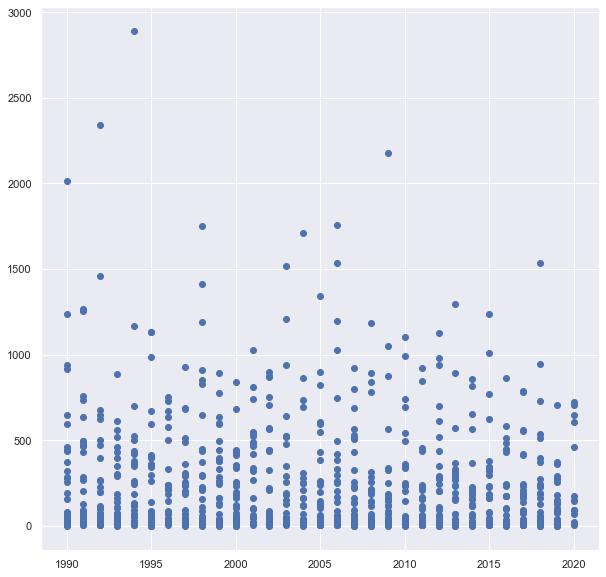

In [3]:
print(f"Number of rows and columns for number_of_fires_by_cause:  {number_of_fires_by_cause.shape}")
print(f"Columns in the dataset: {number_of_fires_by_cause.columns}")
print(number_of_fires_by_cause.describe().T)
number_of_fires_by_cause.describe(include='object').T

sns.set_theme(style="darkgrid")

plt.figure(figsize=(10,10))
plt.plot(number_of_fires_by_cause['ï»¿Year'],number_of_fires_by_cause['Number'],'o')
plt.show()


#### Observation
- This dataset shows the number of fires for different causes of fires from 1990 to 2020
- Average/mean number of fires is around 235. Upper quartile value is 330, which means that 75% of number of fires are 330 or less. This implies that less high number of fires were observed from 1990 to 2020 
- There is large variation shown in the last two plots. Plotting the numbers-of-fires (along y-axis) in a FacetGrid (for different provinces and territories) would present subplots with skewed y-axis. To ensure a uniform y-axis for all subplots of a Facetgrid, I will calculate another column titled "Number_Percentage" which will contain the percentage of number of fires.


Number of rows and columns for area_burned_by_fire_size:  (2269, 11)
Columns in the dataset: Index(['ï»¿Year', 'AnnÃe', 'ISO', 'Jurisdiction', 'Juridiction',
       'Fire size class', 'Classe de superficie â¡ l'extinction ',
       'Area (hectares)', 'Data Qualifier', 'Superficie (en hectare)',
       'Qualificatifs de donnÃes'],
      dtype='object')
                          count          mean            std     min      25%  \
ï»¿Year                  2269.0   2004.655796       8.760284  1990.0  1997.00   
AnnÃe                   2269.0   2004.655796       8.760284  1990.0  1997.00   
Area (hectares)          2269.0  32854.991669  126299.383951     0.0    53.99   
Superficie (en hectare)  2269.0  32854.991669  126299.383951     0.0    53.99   

                            50%     75%        max  
ï»¿Year                  2005.0  2012.0     2020.0  
AnnÃe                   2005.0  2012.0     2020.0  
Area (hectares)           466.1  9897.2  2447100.0  
Superficie (en hectare)  

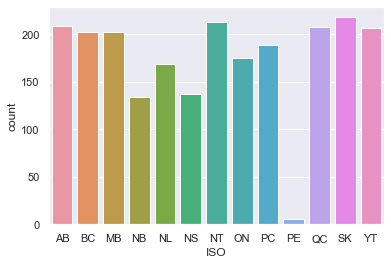

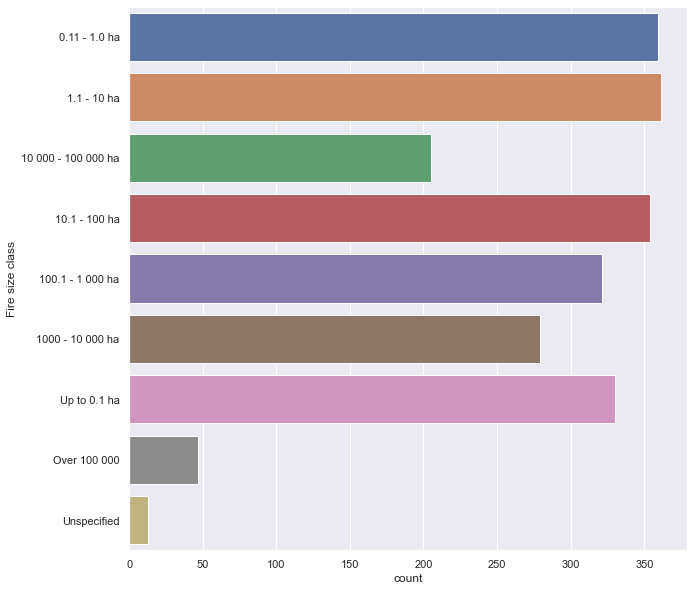

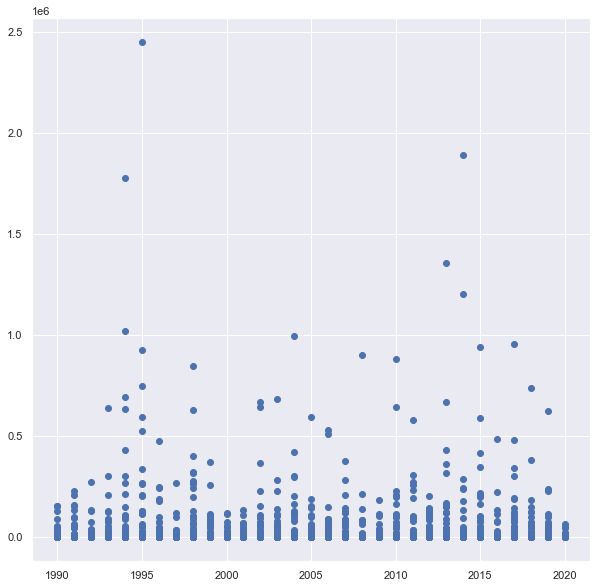

In [4]:
print(f"Number of rows and columns for area_burned_by_fire_size:  {area_burned_by_fire_size.shape}")
print(f"Columns in the dataset: {area_burned_by_fire_size.columns}")
print(area_burned_by_fire_size.describe().T)
area_burned_by_fire_size.describe(include='object').T

sns.set_theme(style="darkgrid")
ax = sns.countplot(x='ISO',data=area_burned_by_fire_size)
plt.show()
plt.figure(figsize=(10,10))
ay = sns.countplot(y='Fire size class',data=area_burned_by_fire_size)

plt.show()

plt.figure(figsize=(10,10))
plt.plot(area_burned_by_fire_size['ï»¿Year'],area_burned_by_fire_size['Area (hectares)'],'o')
plt.show()



#### Observation
- This data shows area burnt for different fire sizes. No negative values seen
- Minimum value of area-burnt is 0. As mentioned above, these values will be removed in next steps.
- Prince Edward Island has small number of observations; only 5 over two years. As mentioned above, these values will be removed as they are insufficient to deduce any trend/observations over a thirty year period.
- The second plot shows that some fire sizes are Unspecified. These will be removed.
- The second plot shows that over thirty year period, there were relatively few (less than 50) fires over the size of 100,000 hectares. 



Number of rows and columns for number_of_fires_by_fire_size:  (2269, 11)
Columns in the dataset: Index(['ï»¿Year', 'AnnÃe', 'ISO', 'Jurisdiction', 'Juridiction',
       'Fire size class', 'Classe de superficie â¡ l'extinction ', 'Number',
       'Data Qualifier', 'Nombre', 'Qualificatifs de donnÃes'],
      dtype='object')
          count         mean         std     min     25%     50%     75%  \
ï»¿Year  2269.0  2004.655796    8.760284  1990.0  1997.0  2005.0  2012.0   
AnnÃe   2269.0  2004.655796    8.760284  1990.0  1997.0  2005.0  2012.0   
Number   2269.0    97.490524  222.307885     1.0     8.0    27.0    86.0   
Nombre   2269.0    97.490524  222.307885     1.0     8.0    27.0    86.0   

            max  
ï»¿Year  2020.0  
AnnÃe   2020.0  
Number   2908.0  
Nombre   2908.0  


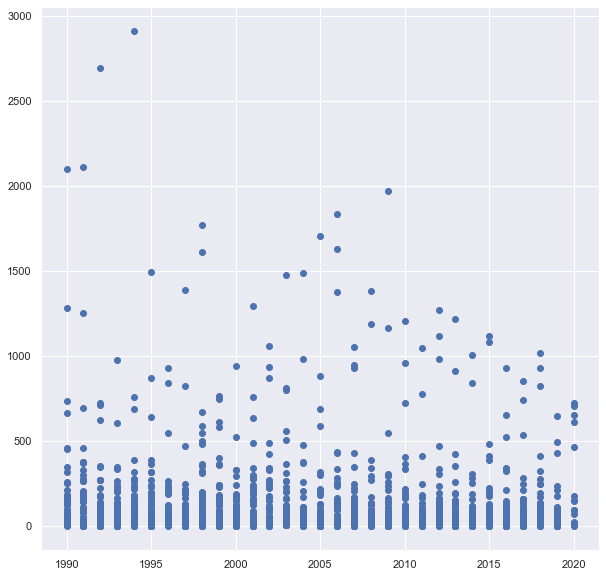

In [5]:
print(f"Number of rows and columns for number_of_fires_by_fire_size:  {number_of_fires_by_fire_size.shape}")
print(f"Columns in the dataset: {number_of_fires_by_fire_size.columns}")
print(number_of_fires_by_fire_size.describe().T)
number_of_fires_by_fire_size.describe(include='object').T

sns.set_theme(style="darkgrid")


plt.figure(figsize=(10,10))
plt.plot(number_of_fires_by_fire_size['ï»¿Year'],number_of_fires_by_fire_size['Number'],'o')
plt.show()

#### Observation
- This dataset shows the numbers for different fire sizes
- No negative values seen
- There is large variation shown in the last two plots. Plotting the numbers-of-fires (along y-axis) in a FacetGrid (for different provinces and territories) would present subplots with skewed y-axis. To ensure a uniform y-axis for all subplots of a Facetgrid, I will calculate another column titled "Number_Percentage" which will contain the percentage of number of fires.

In [6]:
## One of the other group members is combining the months data with Temperatures. Following is my EDA analysis for months datas but observations were 
# similar to ones gleaned from pervious data. My research question does not concern the months dataset. Thus, I have commented out the code for
# months dataset below. If at a later date I decide to work with months dataset, I may resuse some of code below

# print(f"Number of rows and columns for area_burned_by_month:  {area_burned_by_month.shape}")
# print(f"Columns in the dataset: {area_burned_by_month.columns}")
# print(area_burned_by_month.describe().T)
# area_burned_by_month.describe(include='object').T


# sns.set_theme(style="darkgrid")
# ax = sns.countplot(x='ISO',data=area_burned_by_month)
# plt.show()
# plt.figure(figsize=(10,10))
# ay = sns.countplot(x='Month',data=area_burned_by_month)
# plt.show()

# plt.figure(figsize=(10,10))
# plt.plot(area_burned_by_month['ï»¿Year'],area_burned_by_month['Area (hectares)'],'o')
# plt.show()

#### Observations about the Area_burned_by_month dataset
# - This data set shows the area-burnt for all months from 1990 to 2020
# - 75% of area-burnt is less than 2700 
# - Prince Edward Island has only 5 values over 2 years. These are to be removed
# - Months with unspecified values are to be removed
# - High number of fires observed from May to August relative to winter months

In [7]:
## One of the other group members is combining the months data with Temperatures. Following is my EDA analysis for months datas but observations were 
# similar to ones gleaned from pervious  data. My research question does not concern the months dataset. Thus, I have commented out the code for
# months dataset below. If at a later date I decide to work with months dataset, I may resuse some of code below


# print(f"Number of rows and columns for number_of_fires_by_month:  {number_of_fires_by_month.shape}")
# print(f"Columns in the dataset: {number_of_fires_by_month.columns}")
# print(number_of_fires_by_month.describe().T)
# number_of_fires_by_month.describe(include='object').T

# sns.set_theme(style="darkgrid")

# plt.figure(figsize=(10,10))
# plt.plot(area_burned_by_month['ï»¿Year'],number_of_fires_by_month['Number'],'o')
# plt.show()

#### Observation
#- 75% of Number of fires observed for different months are 88 or less

## Task 2 & 3: ##
## Load in File and process to obtain clean datasets

In [8]:
import project_functions2 as p2



In [9]:
file1 ='../data/raw/NFD-Area_burned_by_cause_class-ENFR.csv'
Area_by_cause = p2.raw(file1)

file2 ='../data/raw/NFD-Number_of_fires_by_cause_class-ENFR.csv'
Number_by_cause = p2.raw(file2)


combined = p2.intial_process(Area_by_cause,Number_by_cause)

combined = p2.drop_origine(combined)

combined['Number_Percentage'] = p2.percent_calc(combined)



combined.to_csv("../data/processed/Fires_by_cause.csv",index=None)



# Following code was useful in testing the initial_process function. Leaving it for future reference purposes and/or in case I need to test tweaks to initial_process function
# df=(pd.concat([Area_by_cause,Number_by_cause['Number']],axis='columns')
#     .drop(["AnnÈe","Jurisdiction","Juridiction","Data Qualifier","Qualificatifs de donnÈes","Superficie (en hectare)"],axis='columns')
#     .rename(columns={'ISO':"Location"})
#     .rename(columns={'Area (hectares)':"Area_hectares"})
#     .query('Area_hectares >=0.02')
#     .query('Location != "PE" ')
   
#    )




['AB', 'BC', 'MB', 'NB', 'NL', 'NS', 'NT', 'ON', 'PC', 'QC', 'SK', 'YT']
[36984, 56588, 10957, 8754, 3004, 7405, 7194, 34381, 2588, 21222, 16961, 3631]


In [10]:
file3 = '../data/raw/NFD-Area_burned_by_fire_size_class-ENFR.csv'
Area_by_firesize = p2.raw(file3)

file4 = "../data/raw/NFD-Number_of_fires_by_fire_size_class-ENFR.csv"
Number_by_firesize = p2.raw(file4)

combined2 = p2.intial_process(Area_by_firesize,Number_by_firesize)

combined2 = p2.drop_french_firesize(combined2)

combined2['Number_Percentage'] = p2.percent_calc(combined2)

combined2.to_csv("../data/processed/Fires_by_size_class.csv",index=None)


['AB', 'BC', 'MB', 'NB', 'NL', 'NS', 'NT', 'ON', 'PC', 'QC', 'SK', 'YT']
[38015, 56716, 13809, 9985, 3022, 8084, 7295, 35046, 2697, 21222, 16971, 3634]


# Task 4
## Data Analysis

### Analysis of Fires_by_cause Dataset

In [11]:
print(f"Number of rows and columns in the Fires_by_cause dataset:  {combined.shape}")
print(f"Columns in the Fires_by_cause dataset: {combined.columns}")

Number of rows and columns in the Fires_by_cause dataset:  (722, 6)
Columns in the Fires_by_cause dataset: Index(['Year', 'Location', 'Cause', 'Area_hectares', 'Number',
       'Number_Percentage'],
      dtype='object')


In [12]:
combined.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,722.0,2004.664820,8.722799,1990.000000,1997.000000,2005.000000,2012.000000,2.020000e+03
Area_hectares,722.0,98246.117267,290964.127184,0.100000,480.392500,6734.255000,63301.300000,3.407674e+06
Number,722.0,290.400277,351.835649,1.000000,39.250000,180.000000,421.000000,2.888000e+03
Number_Percentage,722.0,1.662050,1.283539,0.002704,0.686706,1.393846,2.388643,8.588791e+00


In [13]:
combined.describe(include='object').T


,count,unique,top,freq
Location,722,12,AB,68
Cause,722,2,Human activity,380


## Observation
- Province with most observations is Alberta
- Number_Percentage is normalized scale and has less range/variation to it, compared to Number. Using Number_Percentage along y-axis in Facetgrid will result in less skewed plots and allow for more better analysis


### Plotting a FacetGrid based scatterplot, showing variation of (percentage of) Number of Fires Causes from 1990 to 2020
- Such plots will be useful in understanding overall trends and/or patterns (if any) in the fire causes over years


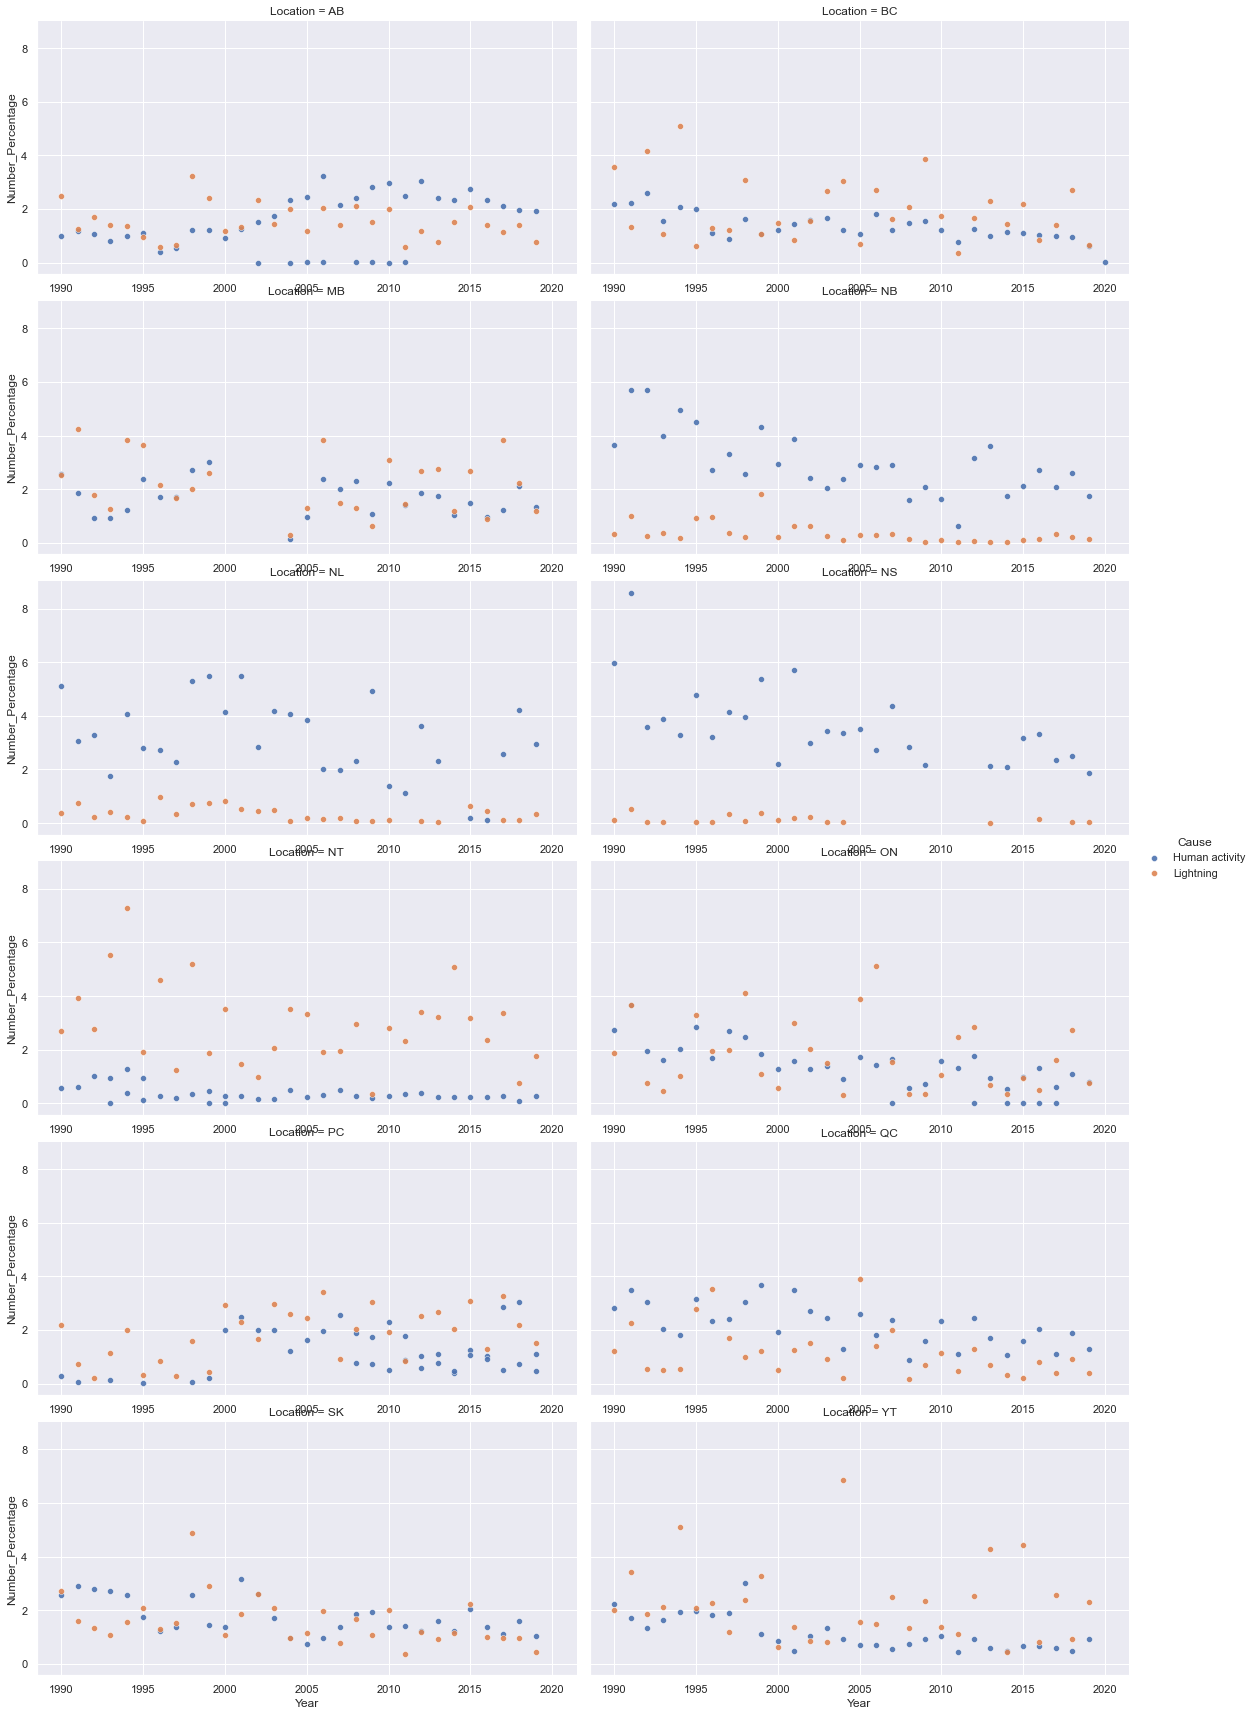

In [14]:
g = sns.FacetGrid(combined, col="Location",hue="Cause",height=4,aspect=2,col_wrap=2,margin_titles=True)
g.map(sns.scatterplot, "Year", "Number_Percentage", alpha=0.9)
g.add_legend()

# To repeat x-labels in every grid
for ax in g.axes.flatten():
    ax.tick_params(labelbottom=True)
    
g.set_axis_labels( x_var=None, y_var=None, clear_inner=False)

## Plot Analysis
- For the Maritime provinces of New Brunswick (NB), Nova Scotia (NS) and NewfoundLand (NL), it is clear that Human activity has been the dominant cause of fire over thirty year period. This means that more fires were caused by humans as opposed to lightning/natural-causes. Also, there is great variation in the number of Human-activity-caused fires seen over thirty years whereas the number of fires caused by lightning has been consistent over thirty years
- For Northwest Territories (NT), lightning has been the dominant cause of fire. There is great variation in the number of Lightning-caused fires over thirty years whereas the number of fires caused by human activity has stayed consistent.
- For the westernmost locations, British Columbia (BC) and Yukon (YT), lightning seems to have produced (on average) more number of fires relative to human actvitiy. However, the difference b/w lightning-caused-fires and human-caused-fires is less relative to difference for locations mentioned before. For both BC and YT, the variation in number of Lightning-caused-fires is greater than the variation in number of human-caused-fires.
- For Quebec, more fires have been caused by human activity relative to fires caused by lightning. The variation in number of lightning-caused fires seems similar to the variation in number of human-caused-fires.
- For all of remaining locations (SK, MB, ON, AB and PC), it is hard to determine from the scatterplots the overall cause of fire. The number of lightning-caused fires and human-activity-cause fires appear to be similar. I will use bar plots to aid in determining the dominant cause. 
- From the scatter plots, it is hard to deduce any specific pattern or trend in number of fires over thirty year period. As per my discussion with Professor, I will look into using Ridgeplots for next Milestones to try to determine any pattern/trends in number of fires over thirty year period.

### Plotting a FacetGrid based barplot showing variation of Cumulative (percentage of) Number of Fires Causes from 1990 to 2020 
- Such plots will help in clearly identifying the dominant/common Fire cause for each province and territory



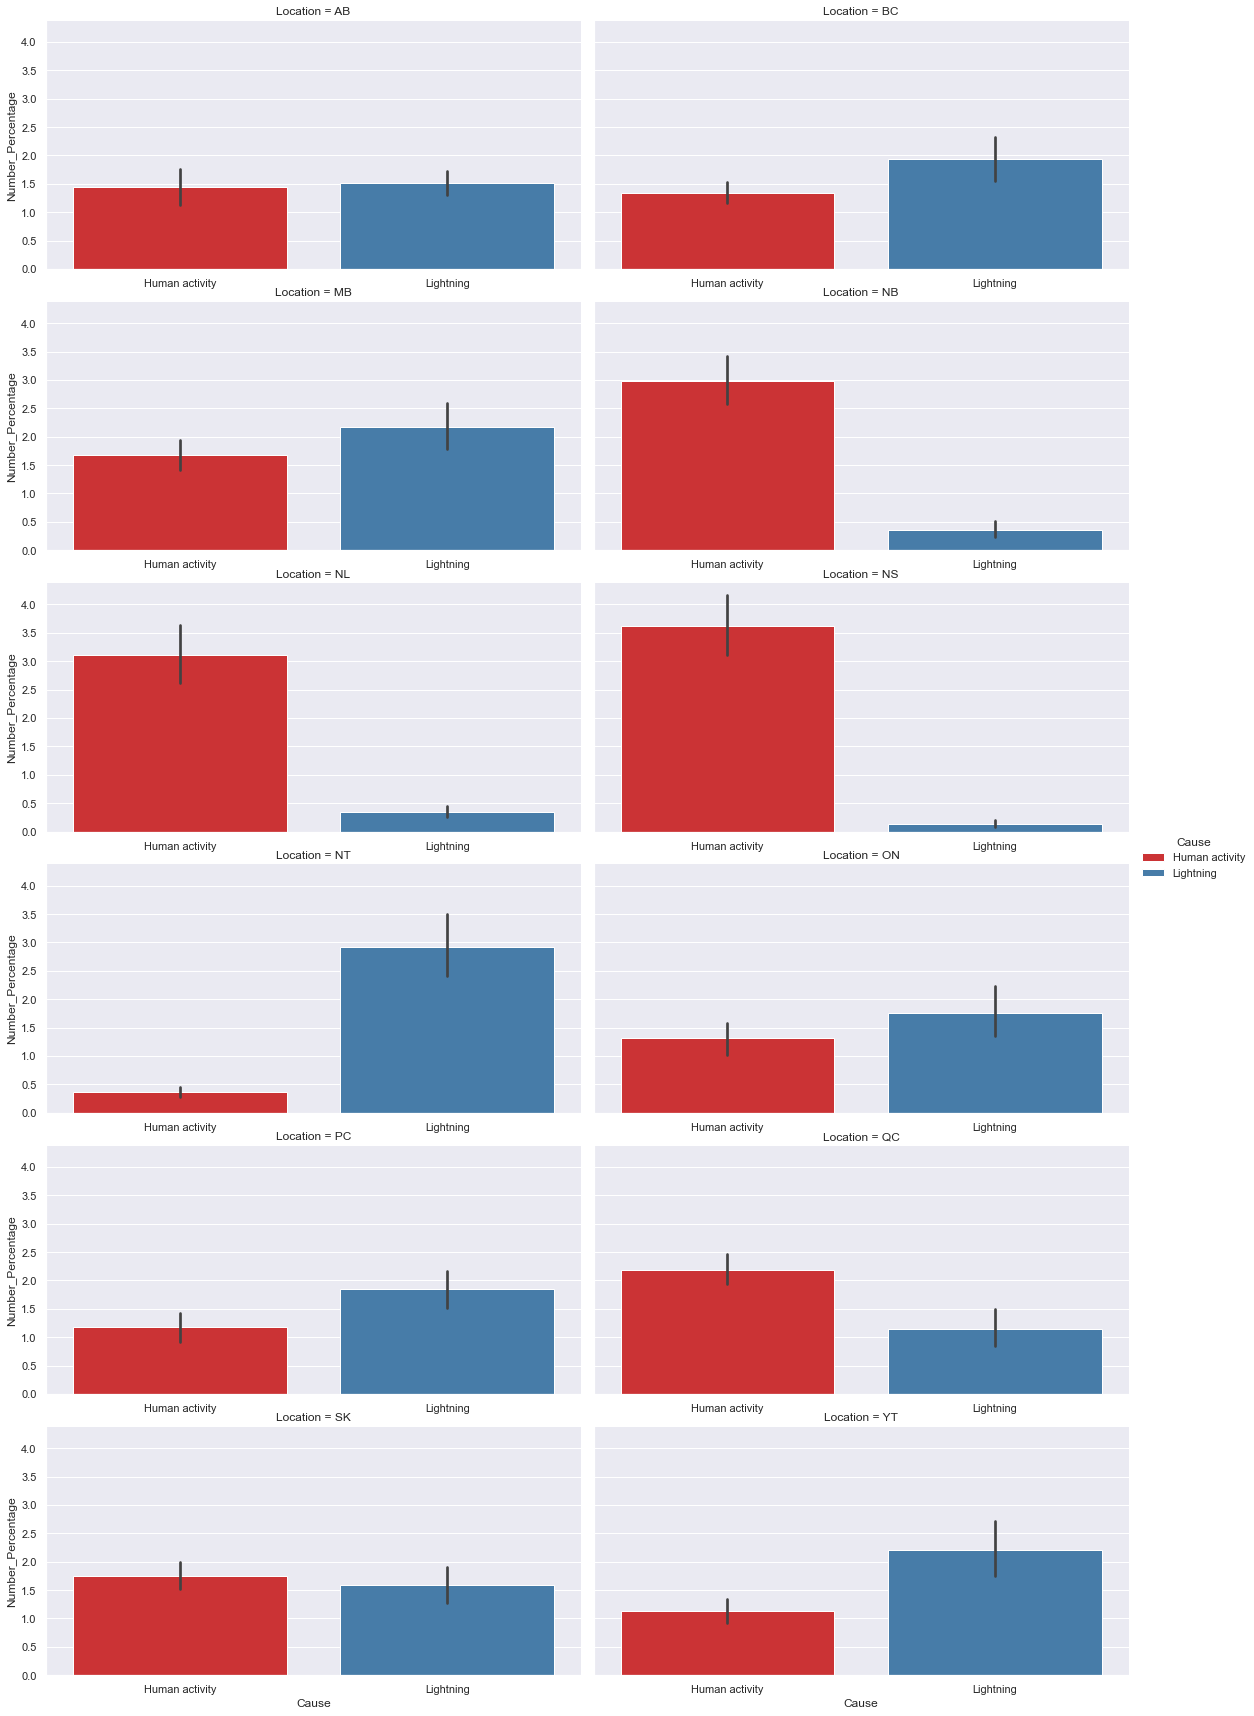

In [15]:
g = sns.FacetGrid(combined, col="Location",hue="Cause",hue_order=["Human activity", "Lightning"],palette="Set1",height=4,aspect=2,col_wrap=2)

g.map(sns.barplot,"Cause","Number_Percentage",order=["Human activity", "Lightning"])
g.add_legend()

# To repeat x-labels in every grid
# source:  https://stackoverflow.com/questions/52182322/repeating-x-axis-labels-for-all-facets-using-facetgrid-in-seaborn
for ax in g.axes.flatten():
    ax.tick_params(labelbottom=True)
    
plt.savefig("../images/barplot_cause_of_fire.png")

## Plot Analysis
- The bar plots assist us in identifying the situation of fire-causes for the remaining five locations
- For Manitoba (MB), Ontario (ON) and Parks Canada (PC), lightning caused more fires than human activity over period of thirty years. However, for all three locations, the difference (~ 0.5%) in number of fires between the two causes is less than that for other locations described earlier. 
- For Saskatchewan (SK), Human activity causes slightly more fires than lightning, for period of thirty years.
- In Alberta (AB), the barplots show that fire-causes are almost split equally between Human activity and Lightning.



### Analysis of Fires_by_size Dataset


In [16]:


print(f"Number of rows and columns in the Fires_by_size dataset:  {combined2.shape}")
print(f"Columns in the Fires_by_size dataset: {combined2.columns}")



Number of rows and columns in the Fires_by_size dataset:  (2241, 6)
Columns in the Fires_by_size dataset: Index(['Year', 'Location', 'Fire size class', 'Area_hectares', 'Number',
       'Number_Percentage'],
      dtype='object')


In [17]:
combined2.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,2241.0,2004.538153,8.705781,1990.000000,1997.000000,2005.000000,2012.000000,2.020000e+03
Area_hectares,2241.0,33164.018516,127043.423528,0.100000,55.100000,468.920000,9897.200000,2.447100e+06
Number,2241.0,96.606872,222.095174,1.000000,8.000000,27.000000,84.000000,2.908000e+03
Number_Percentage,2241.0,0.535475,0.696696,0.001763,0.076286,0.297816,0.704486,6.029219e+00


In [18]:
combined2.describe(include='object').T


,count,unique,top,freq
Location,2241,12,SK,217
Fire size class,2241,8,1.1 - 10 ha,359


In [19]:
## Following code was use to obtain scatterplots for NUMBER of different fire sizes from 1990 to 2020. However, the plots obtained were crowded and
# did not convey any useful information. This code is left for reference and/or potential future use

# g2 = sns.FacetGrid(combined2, col="Location",hue="Fire size class",height=4,aspect=2,col_wrap=2,margin_titles=True)
# g2.map(sns.scatterplot, "Year", "Number", alpha=0.9)
# g2.add_legend()
# # g2.set(ylim=(0, 1600))
# g2.set_axis_labels( x_var=None, y_var=None, clear_inner=False)

### Plotting a FacetGrid based barplots showing variation of Cumulative (percentage of) Number of Fire sizes from 1990 to 2020 
- Such plots will help in clearly identifying the common Fire cause for each province and territory

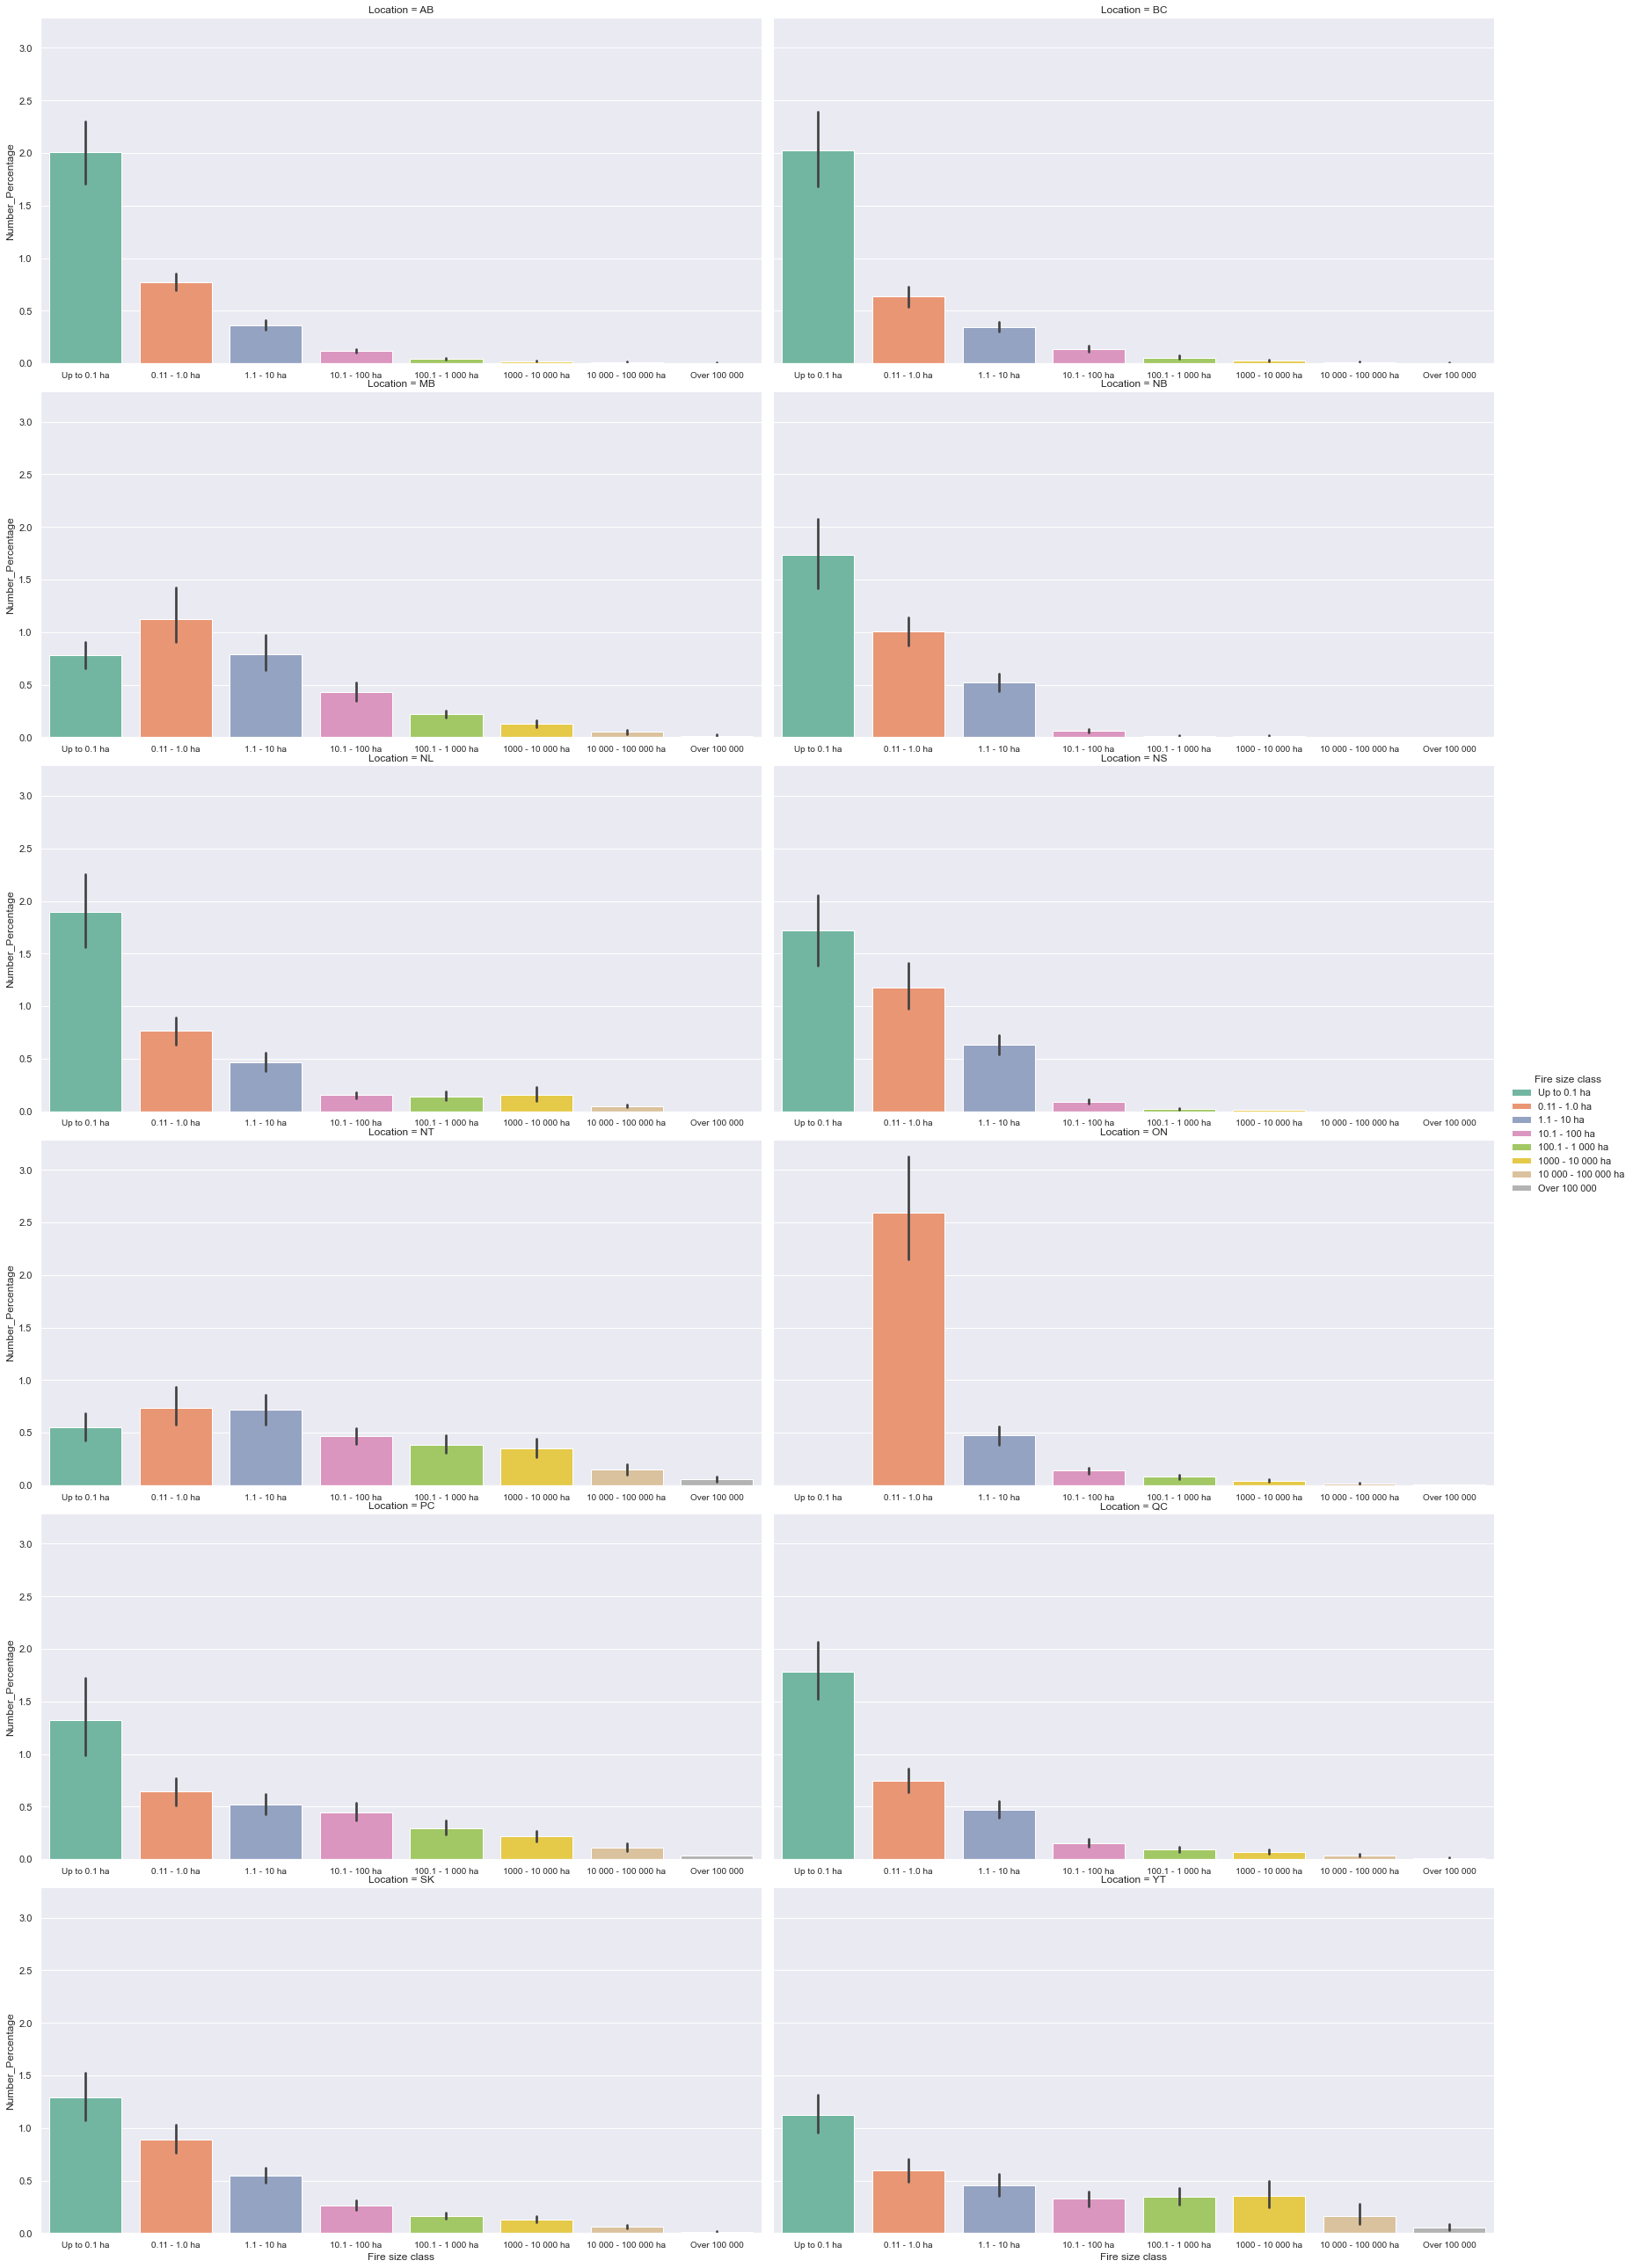

In [20]:

g = sns.FacetGrid(combined2, col="Location",hue="Fire size class",hue_order=["Up to 0.1 ha", "0.11 - 1.0 ha", "1.1 - 10 ha","10.1 - 100 ha","100.1 - 1 000 ha","1000 - 10 000 ha","10 000 - 100 000 ha","Over 100 000"],palette="Set2",height=6,aspect=2,col_wrap=2)
#g = sns.FacetGrid(combined2, row="Location",height=6,aspect=2, margin_titles=True,legend_out=True)
g.map(sns.barplot,"Fire size class","Number_Percentage" ,order=["Up to 0.1 ha", "0.11 - 1.0 ha", "1.1 - 10 ha","10.1 - 100 ha","100.1 - 1 000 ha","1000 - 10 000 ha","10 000 - 100 000 ha","Over 100 000"])
g.add_legend()

# Following code is for increasing the font size of x-axis label
_, xlabels = plt.xticks()
g.set_xticklabels(xlabels, size=10)

# Following code for plotting x-labels on every subplot
for ax in g.axes.flatten():
    ax.tick_params(labelbottom=True)

plt.savefig("../images/barplot_fire_size.png")

## Plot Analysis
- Most of the fires are of size less than 10 hectares
- Apart from Manitoba and Ontairo, the majority of fire size in all locations are really small (less than 0.1 hectares) as evidenced by the green bar plot being the highest.
- In Ontario, the majority of fires occured in size range 0.11 - 1.0 hectares.

In [21]:
## Following is code for combining data for Fires_by_Months to produce a combined dataset. If there is time, I might reuse some of this code at later stage.

# file5 = "../data/raw/NFD-Area_burned_by_month-ENFR.csv"
# Area_by_month = p2.raw(file5)

# file6 = "../data/raw/NFD-Number_of_fires_by_month-ENFR.csv"
# Number_by_month = p2.raw(file6)

# combined3 =  p2.intial_process(Area_by_month,Number_by_month)

# combined3 = p2.drop_mois(combined3)

# combined3.to_csv("../data/processed/Fires_by_month.csv",index=None)

# print(f"Number of rows and columns in the dataset:  {combined3.shape}")
# print(f"Columns in the dataset: {combined3.columns}")

#sns.pairplot(combined3)

In [22]:
# combined3.describe().T

In [23]:
# combined3.describe(include='object').T

# combined3.head()

In [24]:
# Using facet grids to obtain scatterplots for months from 1990 t0 2020, for different number of fires

# g3 = sns.FacetGrid(combined3, col="Location",hue="Month",height=4,aspect=2,col_wrap=2,margin_titles=True)
# g3.map(sns.scatterplot, "Year", "Number", alpha=0.9)
# g3.add_legend()

# g3.set_axis_labels( x_var=None, y_var=None, clear_inner=False)

In [25]:
## scatter plots individually
# array = ['PC',"BC","AB","SK","MB",'ON','QC','NB','NS','PE','NL','NT','YT']

# for i in range(0,len(array),2):
#     print(array[i])
#     if i+1 < len(array):
#         print(array[i+1])
    
# for province in array:
#     plt.figure(figsize=(10,10))
#     sns.scatterplot(data=combined3[combined3['Location']==province],x='Year',y='Number',hue='Month',style='Month')
#     plt.show()
    
    


In [26]:
# Using facet grids to obtain box plots showing different months of fires from 1990 to 2020

# g = sns.FacetGrid(combined3, col="Location",height=4,aspect=2,col_wrap=2,margin_titles=True)
# g.map(sns.boxplot,"Month","Number" ,order=["January", "February", "March","April","May","June","July","August","September","October","November","December"])
# g.add_legend()

In [27]:
# Individual box plots

# array = ['PC',"BC","AB","SK","MB",'ON','QC','NB','NS','PE','NL','NT','YT']

# for province in array:
#     plt.figure(figsize=(10,10))
#     sns.boxplot(x='Location',y='Number',data=combined3[combined3['Location']==province],hue='Month',hue_order=["January", "February", "March","April","May","June","July","August","September","October","November","December"])
#     plt.show()

